# Defini√ß√£o de Combined_metric

**Dado**

* Colunas lexicais: $L_i$, $i=1,\dots,n_{\rm lex}$
* Colunas sem√¢nticas: $S_j$, $j=1,\dots,n_{\rm sem}$
* Pesos internos:

  $$
    A1_i\quad\text{para cada }L_i,\quad\sum_{i=1}^{n_{\rm lex}}A1_i = 1,
  $$
  $$
    A2_j\quad\text{para cada }S_j,\quad\sum_{j=1}^{n_{\rm sem}}A2_j = 1
  $$
* Pesos globais $B1, B2$:

  $$
   B_1 + B_2 = 1
  $$

**1. C√°lculo dos scores parciais**

$$
\begin{aligned}
\text{lexical\_score}
&= \sum_{i=1}^{n_{\rm lex}} A1_i \;L_i,\\
\text{semantic\_score}
&= \sum_{j=1}^{n_{\rm sem}} A2_j \;S_j.
\end{aligned}
$$

**2. Combina√ß√£o final**

$$
\text{combined\_metric}
= B_1 \,\times\, \text{lexical\_score}
\;+\;
B_2 \,\times\, \text{semantic\_score}.
$$

---

# Gerando Base Agg Frame

In [1]:
%load_ext autoreload
%autoreload 2

In [30]:
import research.src.functions as functions
import research.src.constants as constants 

In [11]:
avg_summeval_metrics,df_agg = functions.get_agg_frame(n=50,cache=True,save=True,only_cached=False)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 550/550 [13:44<00:00,  1.50s/it]


In [64]:
df_agg.shape

(80, 11)

## Visualizando Corr com pesos b√°sicos

In [16]:
functions.get_final_corr(avg_summeval_metrics,df_agg)

np.float64(0.21311662917522423)

## Testando pesos customizados

Aqui vamos s√≥ checar o tamanho dos vetores de A1 e A2 

In [17]:
lexical_cols, semantic_cols = functions.get_metric_columns(df_agg)
# 2) Inicializa A1 e A2 com pesos iguais, se n√£o fornecidos
n_lex = len(lexical_cols)
n_sem = len(semantic_cols)
print(f"n_lex: {n_lex}, n_sem: {n_sem}")

n_lex: 3, n_sem: 3


In [18]:
A1 = [.2,.3,.5]
A2 = [.2,.2,.6]
B1 = .3
B2 = .7

In [19]:
teste = functions.get_final_corr(avg_summeval_metrics,df_agg,A1=A1,A2=A2,B1=B1,B2=B2)

In [20]:
teste

np.float64(0.21722360088601203)

# Criando Study - Optuna

In [21]:
import optuna
import pandas as pd
from functools import partial
import src.model as model

## Definindo minha fun√ß√£o Objetivo

In [27]:
objective_fn = partial(
    model.objective,
    avg_summeval_metrics=avg_summeval_metrics,
    df_agg=df_agg
)

In [28]:
study = optuna.create_study(direction="maximize")

[I 2025-05-07 17:06:29,431] A new study created in memory with name: no-name-171c265a-3f1e-41be-a08a-a0ca733c0150


In [29]:
study.optimize(objective_fn, n_trials=1000) 

[I 2025-05-07 17:06:29,943] Trial 0 finished with value: 0.2232784506082021 and parameters: {'A1_0': 0.5039036304620887, 'A1_1': 0.0134800680782452, 'A1_2': 0.7912459178563601, 'A2_0': 0.25381220785598024, 'A2_1': 0.5976574560190376, 'A2_2': 0.29693131699288744, 'B1': 0.8312393516985694, 'B2': 0.7507394191418688}. Best is trial 0 with value: 0.2232784506082021.
[I 2025-05-07 17:06:29,993] Trial 1 finished with value: 0.2134921237316391 and parameters: {'A1_0': 0.5392979452055208, 'A1_1': 0.3041421582752656, 'A1_2': 0.8543072165935198, 'A2_0': 0.15843491090501016, 'A2_1': 0.4765351964518244, 'A2_2': 0.2139357931441077, 'B1': 0.9402609352292721, 'B2': 0.883080623933228}. Best is trial 0 with value: 0.2232784506082021.
[I 2025-05-07 17:06:30,036] Trial 2 finished with value: 0.20513736985140787 and parameters: {'A1_0': 0.14636123505426557, 'A1_1': 0.6344597010158853, 'A1_2': 0.6462946812226181, 'A2_0': 0.07986508536016945, 'A2_1': 0.46065551313102115, 'A2_2': 0.926584715084089, 'B1': 0.69

## Analisando meu Estudo

In [68]:
model.get_best_weights(study,df_agg)


üß™ Resultado do Otimiza√ß√£o de Pesos
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
‚ñ∂Ô∏è Pesos Lexicais (A1):
    ‚Ä¢ lexical_rouge1_f1   : 0.820
    ‚Ä¢ lexical_rougeL_f1   : 0.000
    ‚Ä¢ lexical_bleu        : 0.179

‚ñ∂Ô∏è Pesos Sem√¢nticos (A2):
    ‚Ä¢ semantic_bert_score_precision: 0.234
    ‚Ä¢ semantic_bert_score_recall: 0.532
    ‚Ä¢ semantic_bert_score_f1: 0.234

‚ñ∂Ô∏è Pesos Globais (B1 e B2):
    ‚Ä¢ B1: 0.343
    ‚Ä¢ B2: 0.657

‚ñ∂Ô∏è Melhor correla√ß√£o (objetivo):
    0.254



In [32]:
from plotly.io import show


fig = optuna.visualization.plot_parallel_coordinate(study, params=study.best_params.keys())
show(fig)

# Comparativo Final

Voltar e trazer comparativo do df_agg s√≥ que pontual e com os melhores pesos definidos pelo OPTUNA

In [43]:
A1_best_params = [v for c,v in study.best_params.items() if c.startswith("A1")]
A2_best_params = [v for c,v in study.best_params.items() if c.startswith("A2")]
B1_best_param = study.best_params["B1"]
B2_best_param = study.best_params["B2"]

In [48]:
comparative_metrics_frame = functions.get_combinated_metric(avg_summeval_metrics, df_agg, constants.JOIN_COLS,
                                                            A1_best_params,A2_best_params,B1_best_param,B2_best_param)
correlation_table_best_param = functions.get_corr(comparative_metrics_frame, constants.EVAL_COLS, constants.HUMAN_COLS,  constants.METHODS)

In [49]:
correlation_table_best_param.tail()

exp_coherence  exp_consistency  exp_fluency  \
semantic_bert_score_precision       0.146766         0.058911    -0.100914   
semantic_bert_score_recall          0.286609         0.110958     0.008452   
semantic_bert_score_f1              0.263695         0.105425    -0.049613   
semantic_overall_mean               0.262811         0.105681    -0.049613   
hybrid_quality_score                0.271243         0.098544    -0.053194   

                               exp_relevance  exp_overall_mean  
semantic_bert_score_precision       0.401860          0.205243  
semantic_bert_score_recall          0.232284          0.176752  
semantic_bert_score_f1              0.329372          0.209796  
semantic_overall_mean               0.331776          0.210735  
hybrid_quality_score                0.338239          0.238040

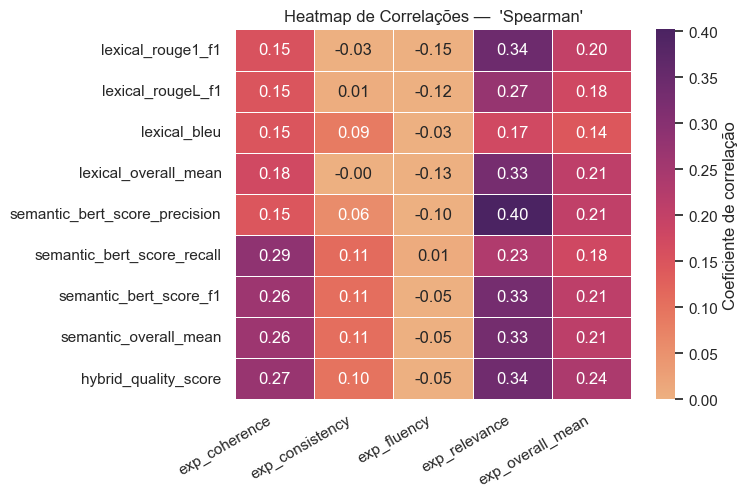

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", palette="flare")  # ou 'rocket', 'mako'‚Ä¶

ax = sns.heatmap(
    correlation_table_best_param,          # seu DataFrame
    cmap="flare",                          # mesma paleta do set_theme
    annot=True,                            # escreve os n√∫meros na c√©lula
    fmt=".2f",                             # arredonda para 2‚ÄØcasas decimais
    vmin=0,# vmax=0.4,                   # (opcional) mant√©m a escala coerente
    cbar_kws={"label": "Coeficiente de correla√ß√£o"},
    linewidths=0.5                         # finas linhas divis√≥rias
)
ax.set_title(f"Heatmap de Correla√ß√µes ‚Äî  '{constants.METHODS[0].title()}'")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")


plt.show()